In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statistics import mean
%matplotlib inline

In [851]:
df = pd.read_csv('Train.csv')

In [852]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [853]:
df.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [854]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [855]:
df['O_Type'] = df['Outlet_Type'].map({'Supermarket Type1':1,'Supermarket Type2':2,'Grocery Store':0})
df['Outlet_Size']=df['Outlet_Size'].map({'Small':0,'Medium':1,'High':2,np.nan:-1})
df['Item_Visibility'].replace(0,0.06400489326611195,inplace=True)
df.dropna(inplace=True)

In [856]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,O_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,2.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,1.0
3,FDX07,19.20,Regular,0.064005,Fruits and Vegetables,182.0950,OUT010,1998,-1,Tier 3,Grocery Store,732.3800,0.0
4,NCD19,8.93,Low Fat,0.064005,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052,1.0


In [857]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [858]:
df[df['Item_Fat_Content']=='reg'] = 'Regular'

In [859]:
df[df['Item_Fat_Content']=='low fat'] = 'Low Fat'

In [860]:
df[df['Item_Fat_Content']=='LF'] = 'Low Fat'

In [861]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [862]:
df.drop(['Outlet_Identifier'],inplace=True,axis=1)

In [863]:
df.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [864]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,O_Type
0,FDA15,9.3,Low Fat,0.0160473,Dairy,249.809,1,Tier 1,Supermarket Type1,3735.14,1
1,DRC01,5.92,Regular,0.0192782,Soft Drinks,48.2692,1,Tier 3,Supermarket Type2,443.423,2
2,FDN15,17.5,Low Fat,0.0167601,Meat,141.618,1,Tier 1,Supermarket Type1,2097.27,1
3,FDX07,19.2,Regular,0.0640049,Fruits and Vegetables,182.095,-1,Tier 3,Grocery Store,732.38,0
4,NCD19,8.93,Low Fat,0.0640049,Household,53.8614,2,Tier 3,Supermarket Type1,994.705,1


In [865]:
df['Outlet_Location_Type'].replace('Low Fat',np.nan,inplace=True)

In [866]:
df['Outlet_Location_Type'].replace('Regular',np.nan,inplace=True)

In [867]:
df.dropna(axis=0,inplace=True)

In [868]:
df.count()

Item_Identifier         6610
Item_Weight             6610
Item_Fat_Content        6610
Item_Visibility         6610
Item_Type               6610
Item_MRP                6610
Outlet_Size             6610
Outlet_Location_Type    6610
Outlet_Type             6610
Item_Outlet_Sales       6610
O_Type                  6610
dtype: int64

In [869]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [870]:
df['Outlet_Size'].unique()

array([1, -1, 2, 0], dtype=object)

In [871]:
sales1=sales2=sales3=0
for i in range(0,len(df)):
    if df.loc[i]['Outlet_Type'] == 'Supermarket Type1':
        sales1+=df.loc[i]['Item_Outlet_Sales']
    elif df.loc[i]['Outlet_Type'] == 'Supermarket Type2':
        sales2+=df.loc[i]['Item_Outlet_Sales']
    else:
        sales3+=df.loc[i]['Item_Outlet_Sales']
        

In [872]:
sales1

12147044.952999998

In [873]:
sales2

1706922.1128000002

Text(0,0.5,'Sales Count')

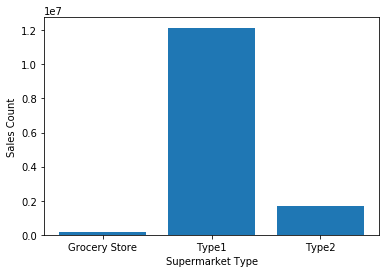

In [874]:
fig,axes = plt.subplots()
axes.bar(['Type1','Type2','Grocery Store'],[sales1,sales2,sales3])
axes.set_xlabel('Supermarket Type')
axes.set_ylabel('Sales Count')

In [875]:
df['Type'] = df['Item_Identifier'].apply(lambda x:x[:2])
df['Type'] = df['Type'].map({'FD':'1','DR':'2','NC':'3'})

In [876]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['OL_Type'] = df['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3})


In [877]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,O_Type,Type,OL_Type
0,FDA15,9.3,0,0.0160473,Dairy,249.809,1,Tier 1,Supermarket Type1,3735.14,1,1,1
1,DRC01,5.92,1,0.0192782,Soft Drinks,48.2692,1,Tier 3,Supermarket Type2,443.423,2,2,3
2,FDN15,17.5,0,0.0167601,Meat,141.618,1,Tier 1,Supermarket Type1,2097.27,1,1,1
3,FDX07,19.2,1,0.0640049,Fruits and Vegetables,182.095,-1,Tier 3,Grocery Store,732.38,0,1,3
4,NCD19,8.93,0,0.0640049,Household,53.8614,2,Tier 3,Supermarket Type1,994.705,1,3,3


In [878]:
x_train,x_test,y_train,y_test = train_test_split(df[['Item_Fat_Content','Item_Visibility','Outlet_Size','OL_Type','Item_MRP','Type','O_Type']],df['Item_Outlet_Sales'])

In [879]:
lr = LinearRegression()

In [880]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [881]:
lr.score(x_test,y_test)*100

48.170043141827804

In [882]:
l = Lasso()
l.fit(x_train,y_train)
l.score(x_test,y_test)*100

48.32948755669345

In [902]:
r = Ridge(alpha=0.001,normalize=True,random_state=42)
r.fit(x_train,y_train)
r.score(x_test,y_test)*100

48.167671817571666